<a href="https://colab.research.google.com/github/shiernee/CUZ_Deep_Learning/blob/main/CUZ_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Part 1: Google Colab Introductory Workshop**

The first part of the workshop will introduce important features in available in Colab. <br>

Colab is an interactive coding enviroment to get start to code easily. The code can be executed easily by click the *play* button on the cell. <br>

Let's get started.


 **Let's try to print *Hello World***


In [ ]:
print('Hello World')

In [ ]:
# It's your turn to try.
# Print your name.
# Type your code below and click the play button to execute the cell.
# You should see you name appear.


**Perform Calculation**

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

In [ ]:
# It's your turn to try.
# Perform calculation of 45 divided by 20 and then multiplies by 8
# Type your code below and click the play button to execute the cell.
# You should get an answer of 18.


In [ ]:
#@title Solution
45/20*8

**Create a Loop**

In [ ]:
# Creating a loop
# Python always start from zero
# range(start, end, step)

for i in range(10):
  print(i)

In [ ]:
# It's your turn to try.
# Create a loop to print from 2 to 10
# Type your code below and click the play button to execute the cell.
# You should get an answer of 2,3,4,5,6,7,8,9,10.


In [ ]:
#@title Solution
for i in range(2, 11):
  print(i)

In [ ]:
# It's your turn to try.
# Create a loop to print from 2 to 10, by skipping 2
# Type your code below and click the play button to execute the cell.
# You should get an answer of 2,4,6,8,10


In [ ]:
#@title Solution
for i in range(2, 11, 2):
  print(i)

**Create a list of values**

In [ ]:
# Create a list of value from 0 to 9
x = []
for i in range(10):
  x.append(i)

print(x)

In [ ]:
# Another compact way to create a list of value
x = [x for x in range(10)]
print(x)

In [ ]:
# It's your turn to try.
# Create a list of value ranging from 2 to 10, by skipping 2
# Type your code below and click the play button to execute the cell.
# Print out the list. You should get [2,4,6,8,10]


In [ ]:
#@title Solution

x = [x for x in range(2, 11, 2)]
print(x)

**Graph Visualization**

In [ ]:
# We need to import packages
# numpy for creating array and matplotlib for plotting

import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)  # create random numbers with a length of 100
x = [x for x in range(len(ys))]
x = np.array(x)

plt.plot(x, ys, '-')
plt.title("Sample Visualization")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# It's your turn to try.
# Create a list of x-value ranging from 0 to 500, by skipping 2
# Create a list of y-value using the formula y = 5x^2
# square --> **; multiple --> *, divide --> /, plus --> +, minus --> -
# Type your code below and click the play button to execute the cell.


In [ ]:
#@title Solution
import numpy as np
from matplotlib import pyplot as plt

x = [x for x in range(0, 501, 2)]
x = np.array(x)
ys = 5*(x**2)

plt.plot(x, ys, '-')
plt.title("Sample Visualization")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Uploading files from your local file system** <br>
files.upload returns a dictionary of the files which were uploaded. The dictionary is keyed by the file name and values are the data which were uploaded. <br>

Refresh the folder in the left panel and you will the dataset you have uploaded.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# **Part 2: Classification of Breast cancer data with Artificial Neural Networks**

Let's build a artificial neural network (ANN) classifier to classify type of breast cancer.

#1. Import Data

In [21]:
import pandas as pd

# Read the dataset from the CSV file
df = pd.read_csv('breast_cancer_dataset.csv')

# Display the first few rows of the dataset
print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [22]:
# Assign X (features) and y (target) from the DataFrame
X = df.drop(columns=['target'])  # Exclude the target column for features
y = df['target']  # Target column

In [23]:
# split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (381, 30)
X_test shape:  (188, 30)


In [49]:
# Create the hidden layer structure
# hidden_layer_sizes = (5)  # 1 hidden layer
# hidden_layer_sizes = (20, 20)  # 2 hidden layers
# hidden_layer_sizes = (30, 50, 100)  # 3 hidden layers


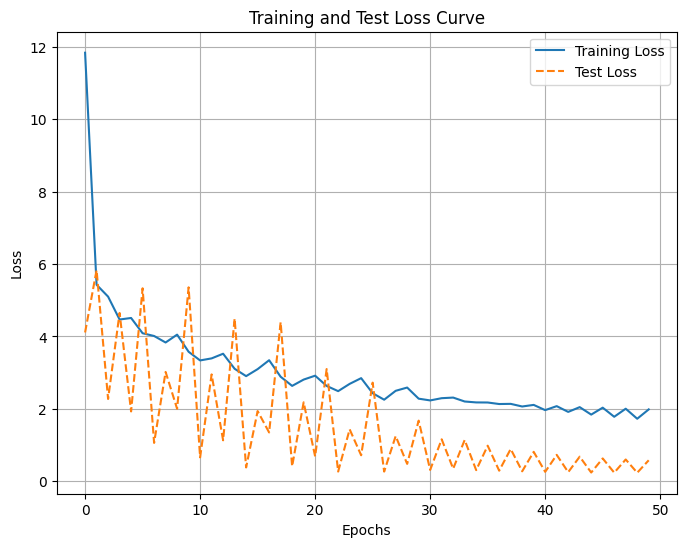

In [50]:
import warnings
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss

# Suppress ConvergenceWarning
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")


# Initialize the MLP classifier with warm_start
clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=1, warm_start=True, random_state=42)

# Variables to store loss at each epoch
train_loss_curve = []
test_loss_curve = []

# Define the number of epochs
n_epochs = 50

# Train incrementally while capturing train and test loss
for epoch in range(n_epochs):
    clf.fit(X_train, y_train)  # Incremental training with warm_start=True
    train_loss_curve.append(clf.loss_)  # Training loss
    test_loss_curve.append(log_loss(y_test, clf.predict_proba(X_test)))  # Test loss

# Plot the training and test loss curves
plt.figure(figsize=(8, 6))
plt.plot(train_loss_curve, label='Training Loss')
plt.plot(test_loss_curve, label='Test Loss', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()
plt.grid()
plt.show()


In [51]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [52]:
# Model Evaluation
from sklearn import metrics

print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred))

Testing Accuracy: 0.7819148936170213


# **Part 3: Experiment**

*   Increase the number of hidden node from 5, 20, 50, 100
*   Increase the number of hidden layer from 1, 2, 3
*   What is the best architecture?

What do you observed?

# **Extra: Train a ML model to predict SGA?AGA**

*   SGA_trainingdata.csv
*   SGA_testingdata.csv

What is the best model accuracy you obtained?

## Acknowledgements

The contents is inspired and based on Lex Friedman's [tutorial_deep_learning_basic.ipynb](https://colab.research.google.com/github/lexfridman/mit-deep-learning/blob/master/tutorial_deep_learning_basics/deep_learning_basics.ipynb#scrollTo=IysPmcOBHBE9)